#                                           Machine Learning ( 2EC601 ) - Special Assignment

## --------------------------------------------------------------------------------------------------------------------------------

# Topic :- 
## Detection and Diagnosis of Hepatitis Virus Infection Based on Human Blood Smear Data in Machine Learning Segmentation Technique

## --------------------------------------------------------------------------------------------------------------------------------

## Import required modules

In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


## --------------------------------------------------------------------------------------------------------------------------------

### ALB - Albumin Blood Test
### ALP - Alkaline Phosphatase Test
### ALT - Alanine Transaminase Test
### AST - Aspartate Aminotransferase Test
### BIL - Bilirubin Test
### CHE - Cholinesterase
### CHOL- Cholesterol.
### CREA - Creatinine 
### GGT - Gamma-glutamyl Transferase (GGT) Test
### PROT - Protein

## --------------------------------------------------------------------------------------------------------------------------------

### Read in Data

In [2]:
df = pd.read_csv('HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### Exploratory Data Analysis

In [3]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


### Mapping target variable to numerical values

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, "1=Hepatitis" : 1, 
                                     "2=Fibrosis" : 1, "3=Cirrhosis" : 1})
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### Ploting Category(Target Variable) vs Other Features Plot

Text(0.5, 0, 'GGT')

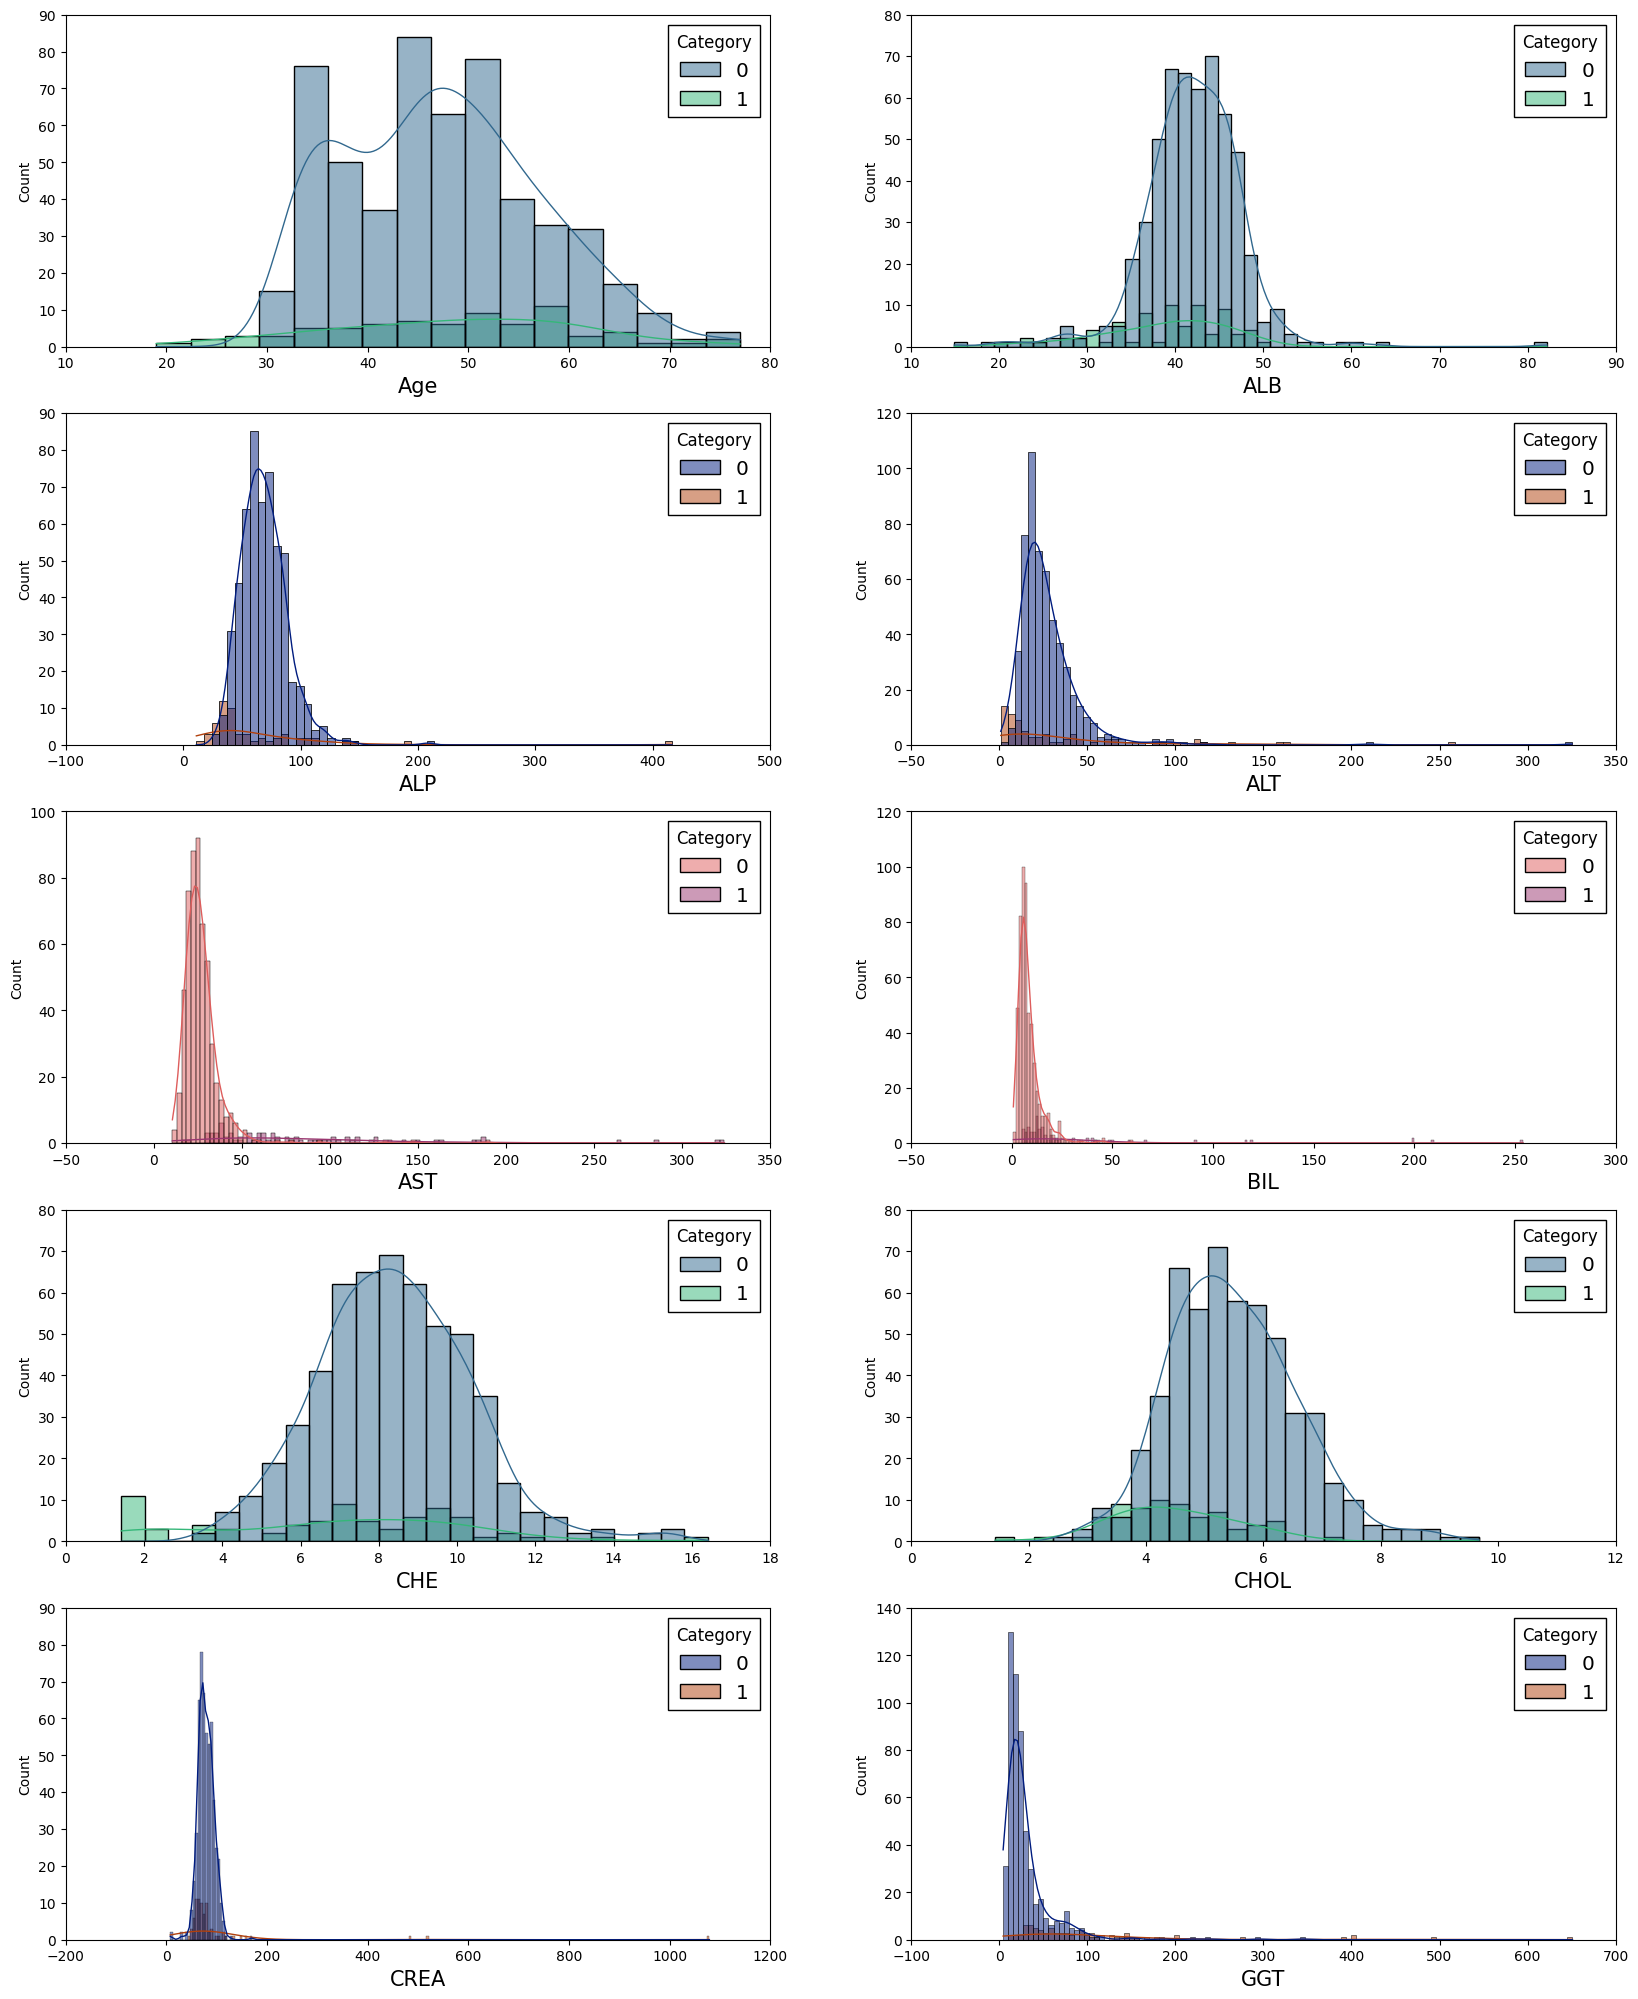

In [5]:
fig, ax = plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("ALT",fontsize=15)

sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel("CHOL",fontsize=15)

sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0])
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1])
ax[4,1].set_xlabel("GGT",fontsize=15)

### Ploting Heatmap

A heat map represents these coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building. The heat map transforms the correlation matrix into color coding.

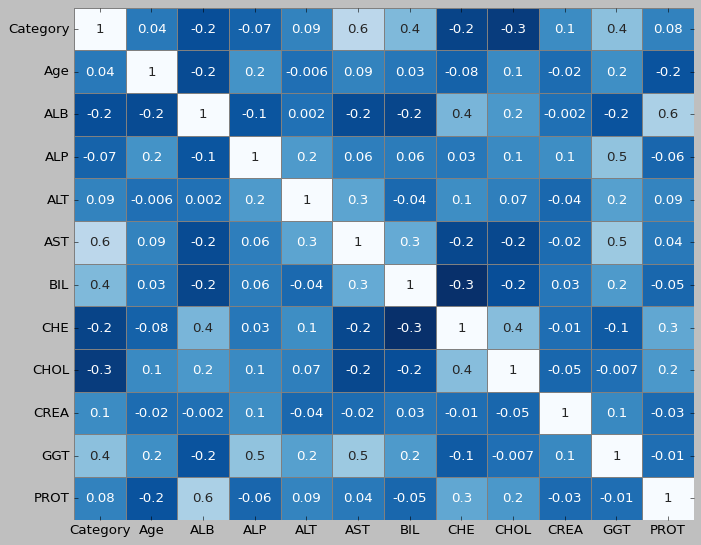

In [6]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey')

### Checking for NaN values and dropping them

In [7]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
df.dropna(inplace=True)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [9]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
608,1,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,1,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,1,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0


In [10]:
X = df.drop(columns='Category') #inputs variables
y = df['Category']              #target variable

print(X.head())
print('-'*100)
print(y.head())
print('-'*100)
print(y.tail())

   Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7
----------------------------------------------------------------------------------------------------
0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64
----------------------------------------------------------------------------------------------------
608    1
609    1
610    1
611    1
612    1
Name: Category, dtype: int64


### Train-test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Oversampling with SMOTE

In [12]:
os = SMOTE(sampling_strategy='minority',random_state = 1,k_neighbors=4)
train_smote_X,train_smote_Y = os.fit_resample(X_train,y_train)
X_train = pd.DataFrame(data = train_smote_X, columns=X_train.columns)
y_train = pd.DataFrame(data = train_smote_Y)

### Scaling

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model


	Accuracy :  1.0
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        17

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118

------------------------------------------------------------


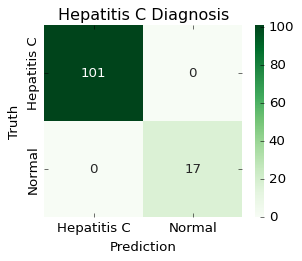

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
#     print(y_test)
#     print(y_pred)
    print("\n\tAccuracy : ",accuracy_score( y_test, y_pred))
    print("-"*60)
    print(classification_report(y_test, y_pred))
    print("-"*60)
    conf_arr = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

    CLASSES = ['Hepatitis C', 'Normal']
    ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

    plt.title('Hepatitis C Diagnosis')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

## KNN Model


	Accuracy :  0.940677966101695
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       101
           1       0.81      0.76      0.79        17

    accuracy                           0.94       118
   macro avg       0.89      0.87      0.88       118
weighted avg       0.94      0.94      0.94       118

------------------------------------------------------------


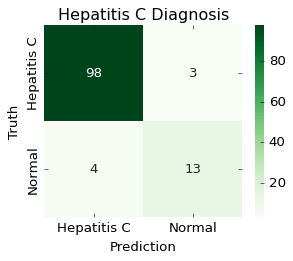

In [15]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
#     print(y_pred)
    print("\n\tAccuracy : ",accuracy_score( y_test, y_pred))
    print("-"*60)
    print(classification_report(y_test, y_pred))
    print("-"*60)
    conf_arr = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

    CLASSES = ['Hepatitis C', 'Normal']
    ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

    plt.title('Hepatitis C Diagnosis')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

## SVM Model (Linear Function)


	Accuracy :  1.0
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        17

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118

------------------------------------------------------------


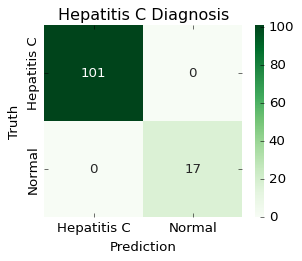

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    svc_lin = SVC(kernel='linear')
    svc_lin.fit(X_train, y_train)
    y_pred = svc_lin.predict(X_test)
    print("\n\tAccuracy : ",accuracy_score( y_test, y_pred))
    print("-"*60)
    print(classification_report(y_test, y_pred))
    print("-"*60)
    conf_arr = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

    CLASSES = ['Hepatitis C', 'Normal']
    ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

    plt.title('Hepatitis C Diagnosis')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

# SVM Model (RBF Function)


	Accuracy :  0.9830508474576272
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       101
           1       0.94      0.94      0.94        17

    accuracy                           0.98       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.98      0.98      0.98       118

------------------------------------------------------------


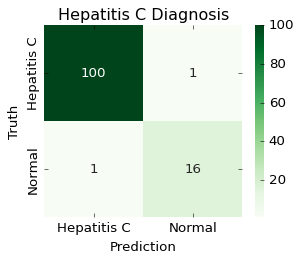

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    svc_rbf = SVC(kernel='rbf')
    svc_rbf.fit(X_train, y_train)
    y_pred = svc_rbf.predict(X_test)
    print("\n\tAccuracy : ",accuracy_score( y_test, y_pred))
    print("-"*60)
    print(classification_report(y_test, y_pred))
    print("-"*60)
    conf_arr = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

    CLASSES = ['Hepatitis C', 'Normal']
    ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

    plt.title('Hepatitis C Diagnosis')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

# Random Forest Classifier


	Accuracy :  0.9576271186440678
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.80      0.94      0.86        17

    accuracy                           0.96       118
   macro avg       0.89      0.95      0.92       118
weighted avg       0.96      0.96      0.96       118

------------------------------------------------------------


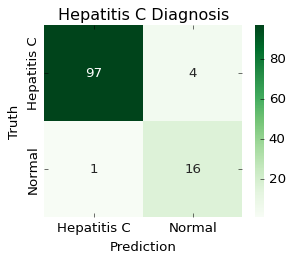

In [18]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    rf = RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print("\n\tAccuracy : ",accuracy_score( y_test, y_pred))
    print("-"*60)
    print(classification_report(y_test, y_pred))
    print("-"*60)
    conf_arr = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')

    CLASSES = ['Hepatitis C', 'Normal']
    ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

    plt.title('Hepatitis C Diagnosis')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

## o)   Summary 

#### Accuracy score :-

1. Logistic Regression     :- 100%
2. KNN                     :- 94.06%
3. SVM (Linear)            :- 100%
4. SVM ( Rbf )             :- 98.30%
5. RandomForest Classifier :- 95.76%

## o) Conclusion

Based on the available data and the machine learning techniques used in this project, it can be concluded that machine learning models are effective in predicting Hepatitis. The results of the project show that the machine learning model can accurately classify patients into those with and without Hepatitis, with a high degree of accuracy and precision.

However, the limitations of the project include the small sample size and limited data. This suggests that more extensive research and data collection are needed to improve the accuracy of the model.

Overall, this project has demonstrated the effectiveness of machine learning techniques in predicting Hepatitis. Future research can explore ways to improve the accuracy of the model and expand the data collection to include a larger sample size to enhance the model's prediction power.

As per our finding , on the basis of the data  set used , Logistic Regression and SVM(Linear) has the highest Accuracy followed by SVM(Rbf) , RandonForest and KNN .





